Preprocess 2: Noise-map
=======================

The noise-map defines the uncertainty in every pixel of your strong lens image. Values are defined as the RMS standard
deviation in every pixel (not the variances, HST WHT-map values, etc.). You MUST be certain that the noise-map is
the RMS standard deviations or else your analysis will be incorrect!

This tutorial describes preprocessing your dataset`s noise-map to adhere too the units and formats required by PyAutoLens.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

#%matplotlib inline
from os import path
import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


Setup the path the datasets we'll use to illustrate preprocessing, which is the folder `dataset/imaging/preprocess`.

In [2]:
dataset_path = path.join("dataset", "imaging", "preprocess")

__Loading Data From Individual Fits Files__

First, lets load a noise-map as an Array2D. This noise-map represents a good data-reduction that conforms to the 
formatting standards I describe in this tutorial!

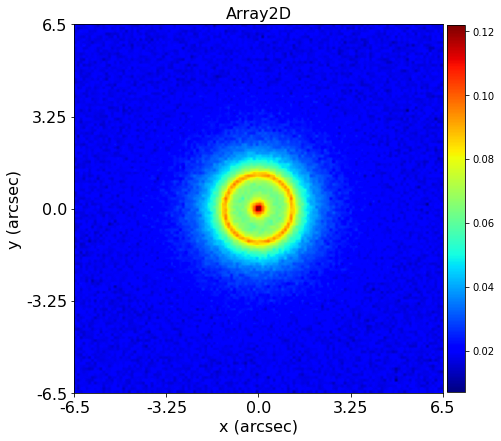

In [3]:
imaging_path = path.join(dataset_path, "imaging")

noise_map = al.Array2D.from_fits(
    file_path=path.join(imaging_path, "noise_map.fits"), pixel_scales=0.1
)

array_plotter = aplt.Array2DPlotter(array=noise_map)
array_plotter.figure()

__1) Converting Noise-Map Like The Image__

If in the previous preprocessing script you did any of the following to the image:

1) Converted it from counts / ADUs / other units to electrons per second.
2) Trimmed / padded the image.
3) Recentered the image.

You must perform identical operations on your noise-map (assuming it is in the same units and has the dimensions as the
image. You can simply cut and paste the appropriate functions in below - I`ve commented out the appropriate functions
you might of used.

In [4]:
# exposure_time_map = al.Array2D.full(fill_value=1000.0, shape_native=noise_map.shape_native, pixel_scales=0.1)
#
# noise_map_processed = al.preprocess.array_from_counts_to_electrons_per_second(
#     array=noise_map, exposure_time_map=exposure_time_map
# )
#
# noise_map_processed = al.preprocess.array_from_adus_to_electrons_per_second(
#     array=noise_map, exposure_time_map=exposure_time_map, gain=4.0
# )

# noise_map_processed = al.preprocess.array_with_new_shape(array=noise_map_large_stamp, new_shape=(130, 130))

# noise_map_processed = al.Array2D.from_fits(
#     file_path=path.join(imaging_path, "noise_map.fits"), pixel_scales=0.1
# )

# array_plotter = aplt.Array2DPlotter(array=noise_map_processed)
# array_plotter.figure()

__Noise Conversions__

There are many different ways the noise-map can be reduced. We are aiming to include conversion functions for all 
common data-reductions. For example, the noise-map may be a HST WHT map, where RMS SD = 1.0/ sqrt(WHT). Note how 
the values of the noise-map go to very large values in excess of 10000.

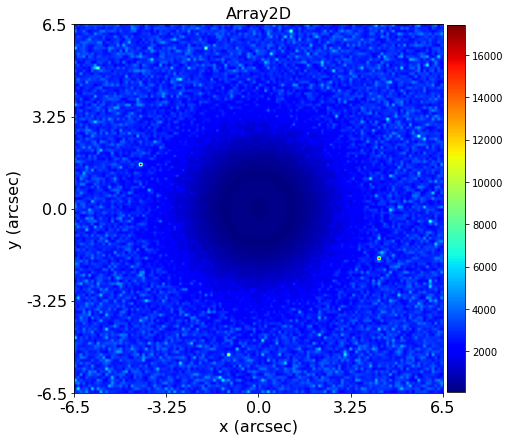

In [5]:
imaging_path = path.join(dataset_path, "imaging_noise_map_wht")

weight_map = al.Array2D.from_fits(
    file_path=path.join(imaging_path, "noise_map.fits"), pixel_scales=0.1
)

array_plotter = aplt.Array2DPlotter(array=weight_map)
array_plotter.figure()

noise_map = al.preprocess.noise_map_from_weight_map(weight_map=weight_map)

array_plotter = aplt.Array2DPlotter(array=noise_map)
array_plotter.figure()